In [5]:
import math
import numpy as np
from pyquaternion import Quaternion

In [6]:
FL_quat = Quaternion(np.array([ 0.68316462, -0.68338771,  0.17581486, -0.18799863]))
F_quat = Quaternion(np.array([ 0.50745829, -0.49812866,  0.49496606, -0.49934369]))
FR_quat = Quaternion(np.array([-0.19470424,  0.17808752, -0.68312934,  0.68095909]))
BL_quat = Quaternion(np.array([-0.67797289,  0.6871698,   0.19201452, -0.1768143]))
B_quat = Quaternion(np.array([-0.49033062,  0.50741961,  0.50819262, -0.49379061]))
BR_quat = Quaternion(np.array([-0.17126042,  0.1897148,   0.68851343, -0.6786766]))

FL_trans = [1.28400265, 0.31639086, 1.67877024]
F_trans = [ 1.50612211, -0.03602647,  1.69421848]
FR_trans = [ 1.27320628, -0.31664681,  1.68114556]
BL_trans = [1.04338732, 0.31565584, 1.66400371]
B_trans = [ 0.81558292, -0.00559198,  1.65395645]
BR_trans = [ 1.04116266, -0.31121292,  1.66718288]

In [7]:
FL_transmat = FL_quat.transformation_matrix
F_transmat = F_quat.transformation_matrix
FR_transmat = FR_quat.transformation_matrix
BL_transmat = BL_quat.transformation_matrix
B_transmat = B_quat.transformation_matrix
BR_transmat = BR_quat.transformation_matrix

FL_transmat[0:3,3] = FL_trans
F_transmat[0:3,3] = F_trans
FR_transmat[0:3,3] = FR_trans
BL_transmat[0:3,3] = BL_trans
B_transmat[0:3,3] = B_trans
BR_transmat[0:3,3] = BR_trans

FL_rotmat = FL_quat.rotation_matrix
F_rotmat = F_quat.rotation_matrix
FR_rotmat = FR_quat.rotation_matrix
BL_rotmat = BL_quat.rotation_matrix
B_rotmat = B_quat.rotation_matrix
BR_rotmat = BR_quat.rotation_matrix

In [8]:
F_ypr = np.array(F_quat.yaw_pitch_roll)
B_ypr = np.array(B_quat.yaw_pitch_roll)

F_ypr = F_ypr * 360 / (2 * math.pi)
B_ypr = B_ypr * 360 / (2 * math.pi)

F_ypr, B_ypr

(array([-50.41340613,  88.98297443, -39.3028511 ]),
 array([-97.57878586, -88.17938321, 172.2672411 ]))

In [9]:
F_transmat

array([[ 0.01131076,  0.01367888,  0.99984246,  1.50612211],
       [-0.99992415,  0.00502913,  0.01124289, -0.03602647],
       [-0.00487454, -0.99989379,  0.01373473,  1.69421848],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


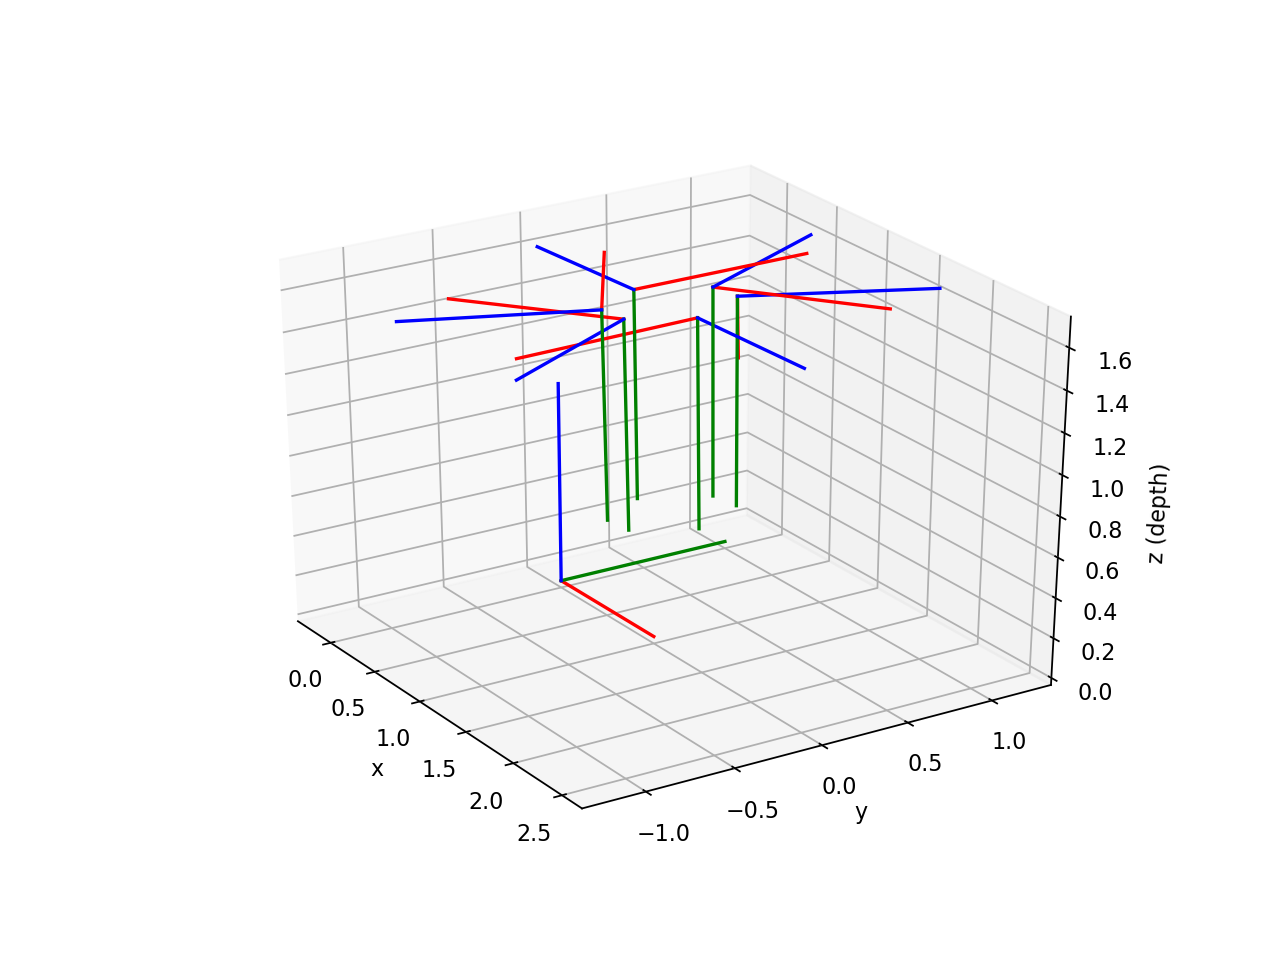

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

p1 = [0, 0, 0]
p2 = [1, 0, 0]
p3 = [0, 0, 0]
p4 = [0, 1, 0]
p5 = [0, 0, 0]
p6 = [0, 0, 1]

p7_F = [0, 0, 1]
p8_B = [1, 0, 1]

xs = [p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]]
ys = [p1[1], p2[1], p3[1], p4[1], p5[1], p6[1]]
zs = [p1[2], p2[2], p3[2], p4[2], p5[2], p6[2]]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z (depth)')
ax.plot(xs[0:2], ys[0:2], zs[0:2], color = 'red', label = 'x-axis')
ax.plot(xs[2:4], ys[2:4], zs[2:4], color = 'green', label = 'y-axis')
ax.plot(xs[4:6], ys[4:6], zs[4:6], color = 'blue', label = 'z-axis')

def transform_and_plot(rotmat, world_points, trans, label):
    p1_prime = np.dot(rotmat, world_points[0]) + trans
    p2_prime = np.dot(rotmat, world_points[1]) + trans
    p3_prime = np.dot(rotmat, world_points[2]) + trans
    p4_prime = np.dot(rotmat, world_points[3]) + trans
    p5_prime = np.dot(rotmat, world_points[4]) + trans
    p6_prime = np.dot(rotmat, world_points[5]) + trans

    xs2 = [p1_prime[0], p2_prime[0], p3_prime[0], p4_prime[0], p5_prime[0], p6_prime[0]]
    ys2 = [p1_prime[1], p2_prime[1], p3_prime[1], p4_prime[1], p5_prime[1], p6_prime[1]]
    zs2 = [p1_prime[2], p2_prime[2], p3_prime[2], p4_prime[2], p5_prime[2], p6_prime[2]]
    ax.plot(xs2[0:2], ys2[0:2], zs2[0:2], color = 'red', label = label)
    ax.plot(xs2[2:4], ys2[2:4], zs2[2:4], color = 'green', label = label)
    ax.plot(xs2[4:6], ys2[4:6], zs2[4:6], color = 'blue', label = label)

world_points = (p1, p2, p3, p4, p5, p6)
    
transform_and_plot(FL_rotmat, world_points, FL_trans, 'FL')
transform_and_plot(F_rotmat, world_points, F_trans, 'F')
transform_and_plot(FR_rotmat, world_points, FR_trans, 'FR')
transform_and_plot(BL_rotmat, world_points, BL_trans, 'BL')
transform_and_plot(B_rotmat, world_points, B_trans, 'B')
transform_and_plot(BR_rotmat, world_points, BR_trans, 'BR')

# p7_world = np.dot(F_rotmat, p7_F) + F_trans
# ax.plot([p7_world[0]], [p7_world[1]], [p7_world[2]], marker='x',color = 'purple')

# pB_world = np.dot(B_rotmat, p8_B) + B_trans
# ax.plot([pB_world[0]], [pB_world[1]], [pB_world[2]], marker='x',color = 'purple')

# ax.legend()